In [1]:
import os
import pandas as pd
from utils import save_dataframe_as_latex

#database = 'a5a'
#database = 'abalone'
#database = 'CPU_SMALL'
#database = 'Diabetes'
database = 'a5a'

#database = 'eunite2001'

path = '/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/medidas-para-tfm/'
directory = path + f'results/{database}/accuracy_time_stats'  # Replace this with the path to your directory
verbose_path = path + f'results/{database}/verboses'
analysis_files = path + f'analysis/{database}'
plot_path = f'{analysis_files}/plot/'
tables_path = f'{analysis_files}/latex-tables/'

## columns names 
percent_column = 'percent'
n_components_column = 'n_components' 
score_column = 'Mean Score in test'		
time_column = 'Mean Training Time'
damping_column = 'accuracy per unit time in percent'


# Get a list of all files in the directory
files = [file for file in os.listdir(directory) if os.path.isfile(os.path.join(directory, file))]

# Now 'files' contains a list of the names of all files in the directory
print(files)

# Separate files with "classification" in their name
ridge_files = [file for file in files if "ridge" in file]
ridge_files.sort()

# Separate other files
svm_files = [file for file in files if file not in ridge_files]
svm_files.sort()
damping_formula = lambda accuracy, time : accuracy / time *100

score_column, time_column = ('Mean Score in test', 'Mean Training Time')

def damping_df(df):
    df[damping_column] = damping_formula(df[score_column],df[time_column])
    return df

 
# Create a DataFrame for ridge files
ridge_data = pd.DataFrame()
ridge_list = []
ridge_list_names = []
ridge_data_verbose = pd.DataFrame()
for file in ridge_files:
    # mean
    file_path = os.path.join(directory, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    #data[percent_column] = data.apply(compute_percent, axis=1)

    data = damping_df(data)
    ridge_list_names.append(file)
    data = data.sort_values(by=n_components_column)
    data['File'] = file  # Add a column to identify the file 
    ridge_data = pd.concat([ridge_data, data], ignore_index=True)
    ridge_list.append(data)

    # verbose
    file_path = os.path.join(verbose_path, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    data = data.sort_values(by=n_components_column)
    data['File'] = file  # Add a column to identify the file
    ridge_data_verbose = pd.concat([ridge_data_verbose, data], ignore_index=True) 


svm_data = pd.DataFrame()
svm_data_verbose = pd.DataFrame()
svm_list = []
svm_list_names = []
for file in svm_files:
    file_path = os.path.join(directory, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    #data[percent_column] = data.apply(compute_percent, axis=1)
    #data = data.sort_values(by=n_components_column)
    data = damping_df(data)
    data['File'] = file  # Add a column to identify the file
    data = data.sort_values(by=n_components_column)
    svm_data = pd.concat([svm_data, data], ignore_index=True)
    svm_list.append(data)
    svm_list_names.append(file)
    # verbose
    file_path = os.path.join(verbose_path, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    #data[percent_column] = data.apply(compute_percent, axis=1)
    #data = data.sort_values(by=n_components_column)
    data['File'] = file  # Add a column to identify the file
    svm_data_verbose = pd.concat([svm_data_verbose, data], ignore_index=True)

print('Ridge files')
print(svm_list_names)
print('SvM files')
print(svm_list_names)
svm_data

std_column = 'Std Score in test'
if (ridge_list[0][std_column] == 0).all():
    std_column = 'cv_std_test_score'

print(std_column)
svm_data

['Random_Fourier_features_and_SVC_a5a_cv_5.csv', 'Kernel_SVM_a5a_cv_5.csv', 'Kernel_ridge_classification_a5a_cv_5.csv', 'Nystrom_and_ridge_classification_a5a_cv_5.csv', 'Nystrom_and_SVC_a5a_cv_5.csv', 'Random_Fourier_features_and_ridge_classification_a5a_cv_5.csv']
Ridge files
['Kernel_SVM_a5a_cv_5.csv', 'Nystrom_and_SVC_a5a_cv_5.csv', 'Random_Fourier_features_and_SVC_a5a_cv_5.csv']
SvM files
['Kernel_SVM_a5a_cv_5.csv', 'Nystrom_and_SVC_a5a_cv_5.csv', 'Random_Fourier_features_and_SVC_a5a_cv_5.csv']
cv_std_test_score


,percent,n_components,Mean Score in test,Std Score in test,Mean Training Time,Std Training Time,Mean Best Score in CV,Std Best Score in CV,cv_mean_test_score,cv_std_test_score,cv_mean_fit_time,cv_std_fit_time,accuracy per unit time in percent,File
0,100,6414,0.843883,0.0,0.967678,0.0,0.842844,0.0,0.842844,0.008217,0.672621,0.031368,87.206985,Kernel_SVM_a5a_cv_5.csv
1,0,1,0.760125,0.0,0.009083,0.0,0.755691,0.0,0.755691,0.000609,0.008152,0.000391,8368.630582,Nystrom_and_SVC_a5a_cv_5.csv
2,0,65,0.846024,0.0,0.034721,0.0,0.841597,0.0,0.841597,0.005693,0.031060,0.001753,2436.626492,Nystrom_and_SVC_a5a_cv_5.csv
3,1,129,0.845604,0.0,0.076037,0.0,0.841597,0.0,0.841597,0.006286,0.063645,0.003408,1112.096058,Nystrom_and_SVC_a5a_cv_5.csv
4,2,193,0.847286,0.0,0.148749,0.0,0.841598,0.0,0.841598,0.008380,0.166341,0.011044,569.608676,Nystrom_and_SVC_a5a_cv_5.csv
5,2,257,0.846598,0.0,0.154743,0.0,0.842220,0.0,0.842220,0.007214,0.144711,0.011989,547.100434,Nystrom_and_SVC_a5a_cv_5.csv
6,3,321,0.846177,0.0,0.205199,0.0,0.842220,0.0,0.842220,0.006908,0.197971,0.014567,412.369148,Nystrom_and_SVC_a5a_cv_5.csv
7,4,385,0.846828,0.0,0.245566,0.0,0.842376,0.0,0.842376,0.006291,0.219276,0.013241,344.847384,Nystrom_and_SVC_a5a_cv_5.csv
8,4,449,0.847631,0.0,0.297566,0.0,0.842999,0.0,0.842999,0.006101,0.275872,0.006548,284.854749,Nystrom_and_SVC_a5a_cv_5.csv
9,5,514,0.846942,0.0,0.342991,0.0,0.842532,0.0,0.842532,0.006338,0.326235,0.024198,246.928347,Nystrom_and_SVC_a5a_cv_5.csv


In [2]:
def show_dataframe(dataframe, column, ascending = True, decimals = 3, only_relevant_columns = True, n_rows = None):
      pd.reset_option('display.max_colwidth')
      pd.set_option('display.max_rows', n_rows)
      dataframe =  pd.DataFrame(dataframe).round(decimals).sort_values(by=column, ascending= ascending)

      if only_relevant_columns:
            dataframe = dataframe[["File","percent", column, "n_components" ]]
   
      return dataframe

score_column = ridge_data.columns[2]
time_column = ridge_data.columns[4]
name_column = 'File'

def show_verbose(dataframe, column = n_components_column, ascending = False, decimals = 3, n_rows = None):
      pd.set_option('display.max_colwidth', None)
      pd.set_option('display.max_rows', n_rows)
      dataframe =  pd.DataFrame(dataframe).round(decimals).sort_values(by=column, ascending= ascending)
      return dataframe[["Best Parameters","File","percent", "n_components" ]]


In [3]:
# get tables 
columns = [score_column, time_column, damping_column ]
for column in columns:
    column_name = column.replace(' ', '_').replace('_', '-')
    df = show_dataframe(ridge_data, column, ascending=False)
    save_dataframe_as_latex(df, tables_path, f'Ridge-{column_name}-result')
    df = show_dataframe(svm_data, column, ascending=False)
    save_dataframe_as_latex(df, tables_path, f'SVM-{column_name}-result')

DataFrame saved as LaTeX table to /Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/medidas-para-tfm/analysis/a5a/latex-tables/Ridge-Mean-Score-in-test-result.tex
DataFrame saved as LaTeX table to /Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/medidas-para-tfm/analysis/a5a/latex-tables/SVM-Mean-Score-in-test-result.tex
DataFrame saved as LaTeX table to /Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/medidas-para-tfm/analysis/a5a/latex-tables/Ridge-Mean-Training-Time-result.tex
DataFrame saved as LaTeX table to /Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/medidas-para-tfm/analysis/a5a/latex-tables/SVM-Mean-Training-Time-result.tex
DataFrame saved as LaTeX table to /Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/medidas-para-tfm/analysis/a5a/latex-tables/Ridge-accuracy-per-unit-time-in-percent-result.tex
DataFrame saved as LaTeX table to /Users/blancacanocamarero/repositor

# Sort by score 

In [4]:

show_dataframe(svm_data, score_column, ascending=False)

,File,percent,Mean Score in test,n_components
8,Nystrom_and_SVC_a5a_cv_5.csv,4,0.848,449
21,Nystrom_and_SVC_a5a_cv_5.csv,13,0.847,1283
19,Nystrom_and_SVC_a5a_cv_5.csv,12,0.847,1155
17,Nystrom_and_SVC_a5a_cv_5.csv,11,0.847,1027
15,Nystrom_and_SVC_a5a_cv_5.csv,9,0.847,898
13,Nystrom_and_SVC_a5a_cv_5.csv,8,0.847,770
12,Nystrom_and_SVC_a5a_cv_5.csv,7,0.847,706
11,Nystrom_and_SVC_a5a_cv_5.csv,6,0.847,642
33,Random_Fourier_features_and_SVC_a5a_cv_5.csv,7,0.847,706
9,Nystrom_and_SVC_a5a_cv_5.csv,5,0.847,514


# Damping

In [5]:
show_dataframe(ridge_data, damping_column, ascending=False)

,File,percent,accuracy per unit time in percent,n_components
22,Random_Fourier_features_and_ridge_classificati...,0,11472.462,1
1,Nystrom_and_ridge_classification_a5a_cv_5.csv,0,10423.714,1
23,Random_Fourier_features_and_ridge_classificati...,0,5956.401,65
24,Random_Fourier_features_and_ridge_classificati...,1,3870.096,129
2,Nystrom_and_ridge_classification_a5a_cv_5.csv,0,3581.592,65
25,Random_Fourier_features_and_ridge_classificati...,2,2323.135,193
27,Random_Fourier_features_and_ridge_classificati...,3,1902.270,321
26,Random_Fourier_features_and_ridge_classificati...,2,1709.602,257
28,Random_Fourier_features_and_ridge_classificati...,4,1475.095,385
4,Nystrom_and_ridge_classification_a5a_cv_5.csv,2,1207.484,193


# Plotting 
## Ridge

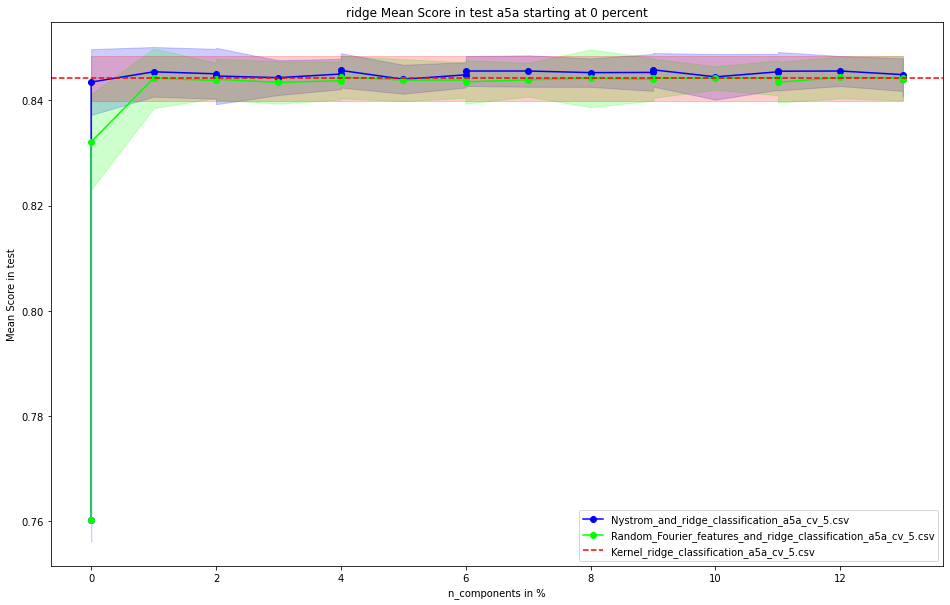

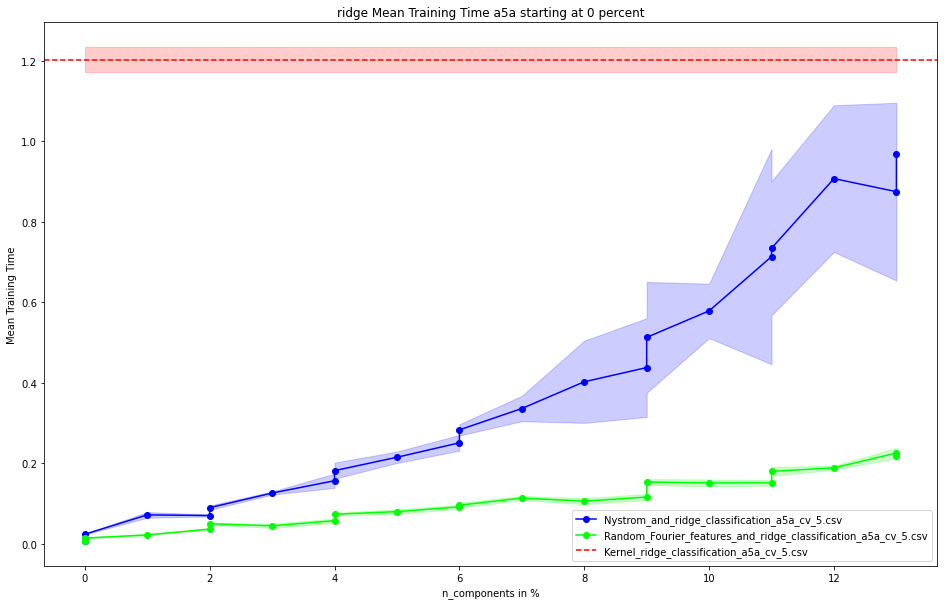

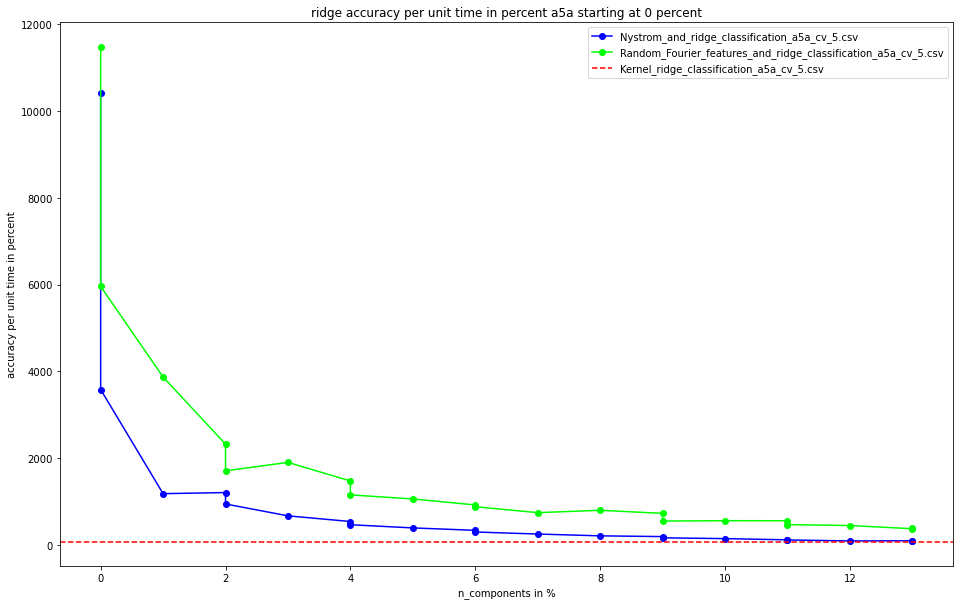

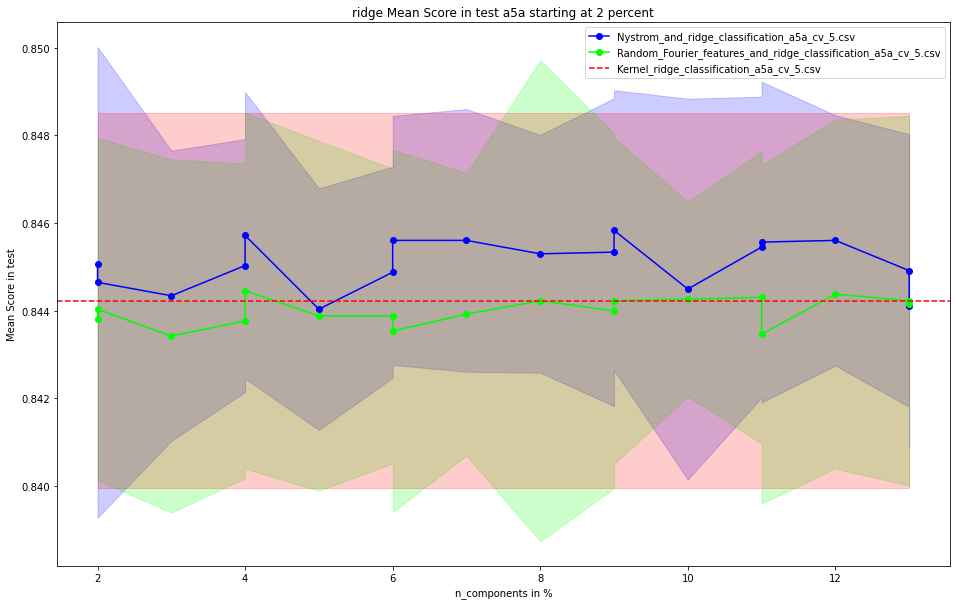

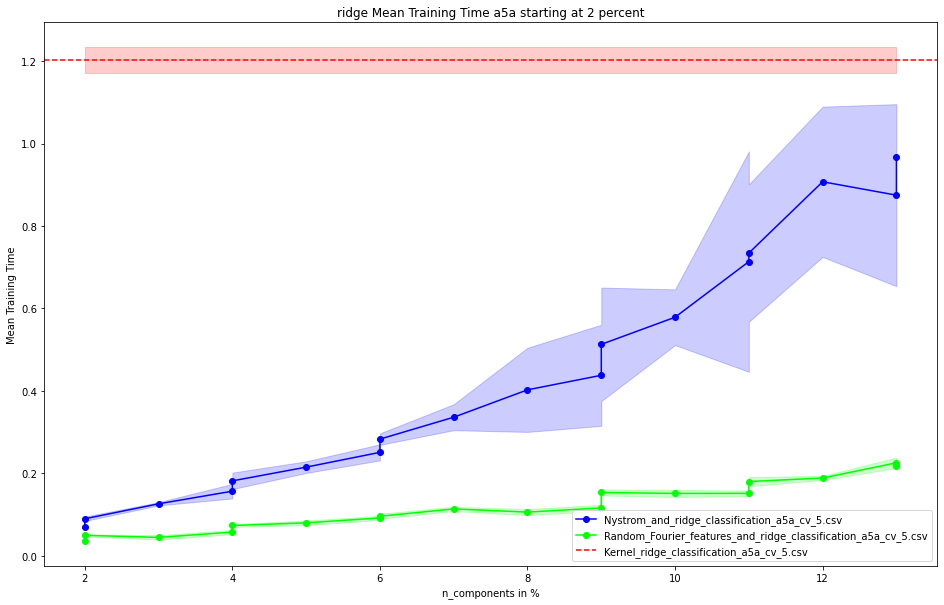

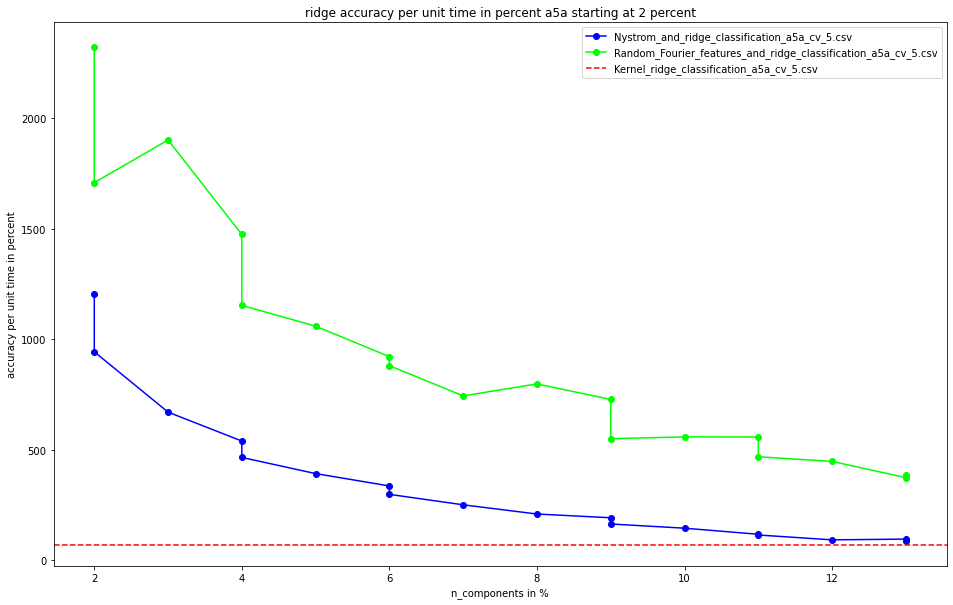

In [6]:
from plotting import view_plots_and_save_them

names_of_std_for_column = {score_column:'Std Score in test', 
    time_column:'Std Training Time',
    damping_column:False
}
if (ridge_list[0][names_of_std_for_column[score_column]] == 0).all():
    names_of_std_for_column = {score_column:'cv_std_test_score', 
        time_column:'cv_std_fit_time',
        damping_column:False
    }
    
columns = [score_column, time_column, damping_column ]

view_plots_and_save_them(df_list = ridge_list, df_list_names=ridge_list_names,
            names_of_std_for_column=names_of_std_for_column, type ='ridge',
            columns=columns, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 0, marker='o')
view_plots_and_save_them(df_list = ridge_list, df_list_names=ridge_list_names,
            names_of_std_for_column=names_of_std_for_column, type ='ridge',
            columns=columns, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 2, marker='o')



## SVM 

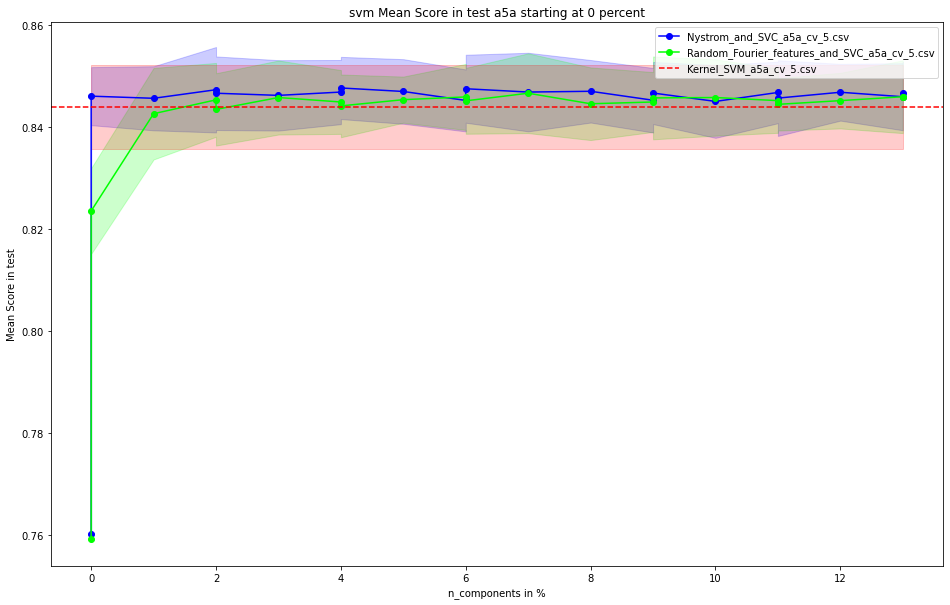

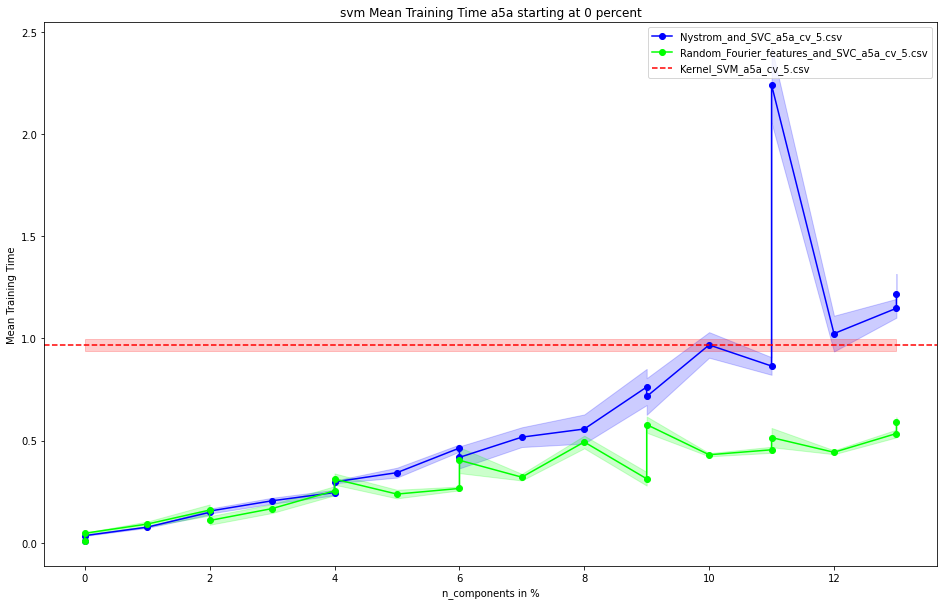

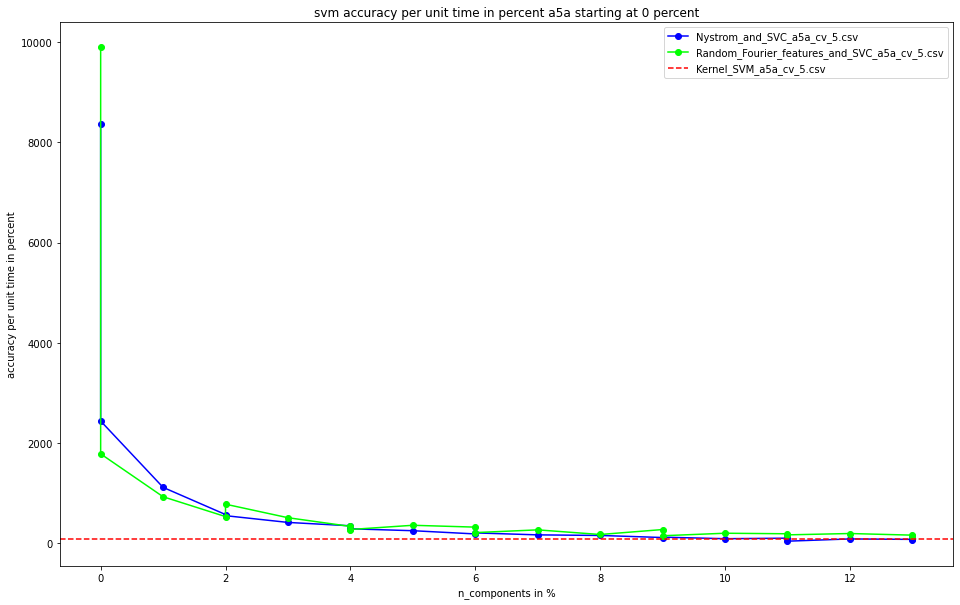

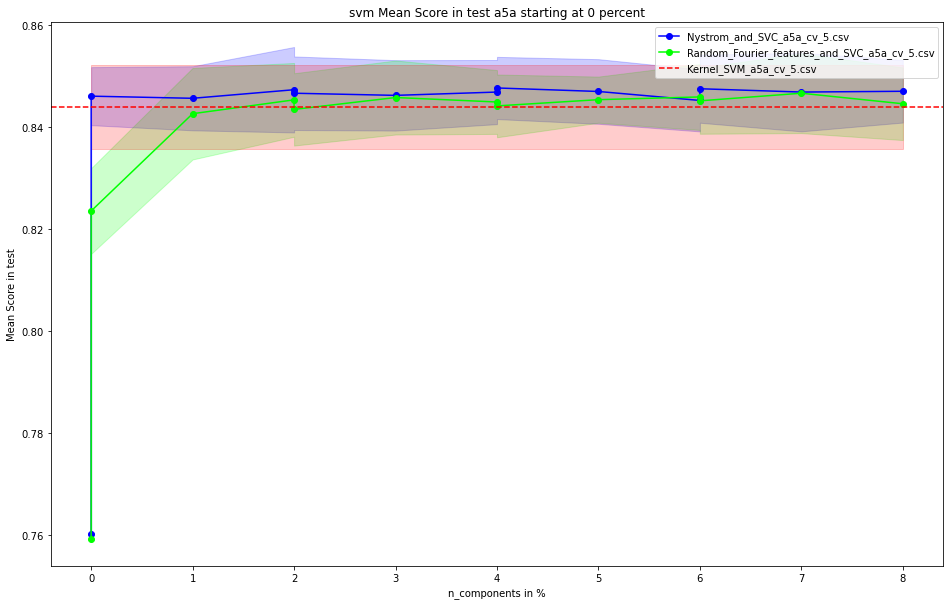

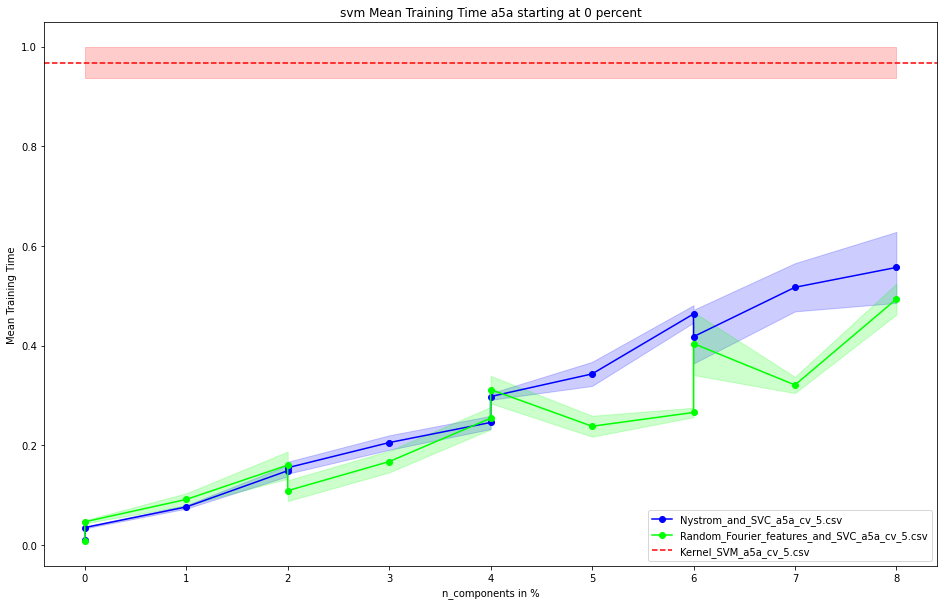

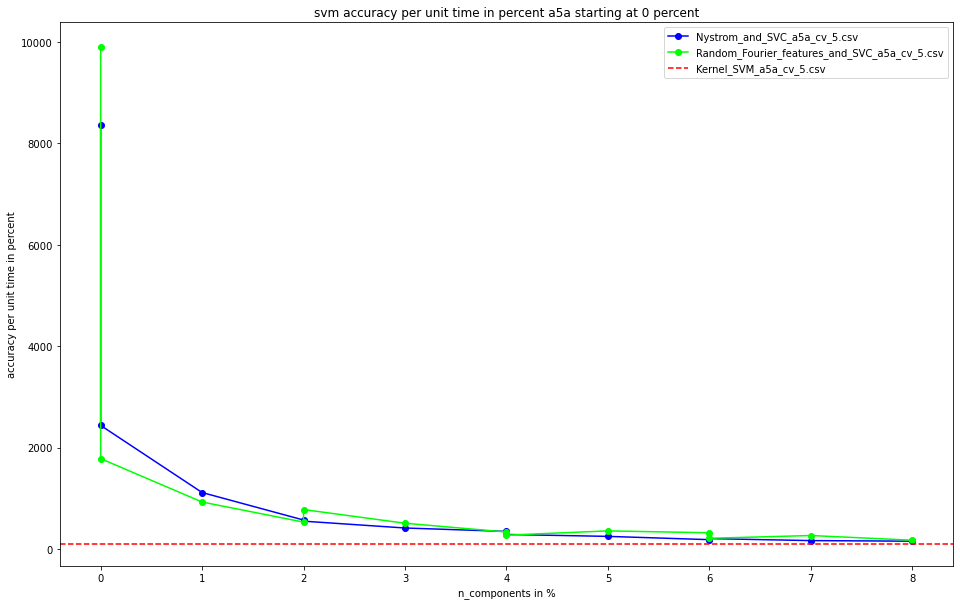

In [7]:
view_plots_and_save_them(df_list = svm_list, df_list_names=svm_list_names,
            names_of_std_for_column=names_of_std_for_column, type ='svm',
            columns=columns, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 0, marker='o')
view_plots_and_save_them(df_list = svm_list, df_list_names=svm_list_names,
            names_of_std_for_column=names_of_std_for_column, type ='svm',
            columns=columns, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 0,
            percent_of_n_components_smaller_than=8, marker='o')

# Hyperparameter

In [8]:
def unique_values(df):
    pd.set_option('display.max_colwidth', None)
    return df.groupby(['Best Parameters', 'File']).size().reset_index(name='Frequency')

df = unique_values(svm_data_verbose)
save_dataframe_as_latex(df, tables_path, 'svm-best-hyperparameters')
df

DataFrame saved as LaTeX table to /Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/medidas-para-tfm/analysis/a5a/latex-tables/svm-best-hyperparameters.tex


,Best Parameters,File,Frequency
0,"{'fourier_random_features__gamma': 0.0003850905910849588, 'svm__C': 0.0001}",Random_Fourier_features_and_SVC_a5a_cv_5.csv,1
1,"{'fourier_random_features__gamma': 0.0003850905910849588, 'svm__C': 6.30957344480193}",Random_Fourier_features_and_SVC_a5a_cv_5.csv,4
2,"{'fourier_random_features__gamma': 5.5294116063016006e-05, 'svm__C': 100.0}",Random_Fourier_features_and_SVC_a5a_cv_5.csv,4
3,"{'fourier_random_features__gamma': 5.5294116063016006e-05, 'svm__C': 6.30957344480193}",Random_Fourier_features_and_SVC_a5a_cv_5.csv,6
4,"{'fourier_random_features__gamma': 7.939532520325204e-06, 'svm__C': 100.0}",Random_Fourier_features_and_SVC_a5a_cv_5.csv,6
5,"{'kernel_svm__C': 1000.0, 'kernel_svm__gamma': 7.939532520325204e-06}",Kernel_SVM_a5a_cv_5.csv,1
6,"{'nystroem__gamma': 0.0010162601626016261, 'svm__C': 3.1622776601683795}",Nystrom_and_SVC_a5a_cv_5.csv,1
7,"{'nystroem__gamma': 0.011497671238805652, 'svm__C': 0.1}",Nystrom_and_SVC_a5a_cv_5.csv,1
8,"{'nystroem__gamma': 7.939532520325204e-06, 'svm__C': 100.0}",Nystrom_and_SVC_a5a_cv_5.csv,13
9,"{'nystroem__gamma': 8.982555655316915e-05, 'svm__C': 100.0}",Nystrom_and_SVC_a5a_cv_5.csv,4


In [9]:
df = unique_values(ridge_data_verbose)
save_dataframe_as_latex(df, tables_path, 'ridge-best-hyperparameters')
df

DataFrame saved as LaTeX table to /Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/medidas-para-tfm/analysis/a5a/latex-tables/ridge-best-hyperparameters.tex


,Best Parameters,File,Frequency
0,"{'fourier_random_features__gamma': 7.939532520325204e-06, 'ridge_classification__alpha': 0.0001}",Random_Fourier_features_and_ridge_classification_a5a_cv_5.csv,6
1,"{'fourier_random_features__gamma': 7.939532520325204e-06, 'ridge_classification__alpha': 0.0031622776601683794}",Random_Fourier_features_and_ridge_classification_a5a_cv_5.csv,11
2,"{'fourier_random_features__gamma': 8.982555655316915e-05, 'ridge_classification__alpha': 0.1}",Random_Fourier_features_and_ridge_classification_a5a_cv_5.csv,3
3,"{'fourier_random_features__gamma': 8.982555655316915e-05, 'ridge_classification__alpha': 100.0}",Random_Fourier_features_and_ridge_classification_a5a_cv_5.csv,1
4,"{'kernel_ridge_classification__alpha': 0.001584893192461114, 'kernel_ridge_classification__gamma': 7.939532520325204e-06}",Kernel_ridge_classification_a5a_cv_5.csv,1
5,"{'nystroem__gamma': 0.011497671238805652, 'ridge_classification__alpha': 0.0031622776601683794}",Nystrom_and_ridge_classification_a5a_cv_5.csv,1
6,"{'nystroem__gamma': 7.939532520325204e-06, 'ridge_classification__alpha': 0.0001}",Nystrom_and_ridge_classification_a5a_cv_5.csv,13
7,"{'nystroem__gamma': 7.939532520325204e-06, 'ridge_classification__alpha': 0.0031622776601683794}",Nystrom_and_ridge_classification_a5a_cv_5.csv,6
8,"{'nystroem__gamma': 8.982555655316915e-05, 'ridge_classification__alpha': 0.1}",Nystrom_and_ridge_classification_a5a_cv_5.csv,1
